# Hands-on session 1

# Example

NSF Research Award Abstracts 1990-2003 Data Set (https://archive.ics.uci.edu/ml/datasets/NSF+Research+Award+Abstracts+1990-2003).


In [455]:
import numpy
import os
import re
import binascii
from time import time

def get_fnames():
    """Read all text files in a folder.
    """
    fnames = []
    for root,_,files in os.walk("../awd_1990_00"):
        for fname in files:
            if fname[-4:] == ".txt":
                fnames.append(os.path.join(root, fname))
    return fnames

In [456]:
print("number of different files: {}".format(len(get_fnames())))

number of different files: 51


In [457]:
# just open one file and read its abstract

def read_file(fname):
    with open(fname, 'r') as f:
        # skip all lines until abstract
        for line in f:
            if "Abstract    :" in line:
                break

        # get abstract as a single string
        abstract = ' '.join([line[:-1].strip() for line in f])
        abstract = re.sub(' +', ' ', abstract)  # remove double spaces
        return abstract

fname = get_fnames()[7]
print(fname,read_file(fname))

../awd_1990_00/a9000048.txt  The Scripps Institute of Oceanography will operate four research vessels: R/V MELVILLE, a 245' general oceanographic vessel constructed by the Navy in 1969; R/V THOMAS WASHINGTON, a 208' research vessel constructed by the Navy in 1965; R/V NEW HORIZON, a 170' research vessel constructed by the University of California in 1978; and R/V ROBERT GORDON SPROUL, a 125' vessel built in 1981 and subsequently converted for research purposes. These vessels are part of a fleet used by the National Science Foundation to support oceanographic research projects. Most oceanographic research projects require highly specialized equipment and extensive support from a ship's crew members. An increasing number of research projects require equipment that must be permanently installed on a ship and for which the ship must be specifically designed. Such equipment also requires highly trained crew members for maintenance and operation. These vessels do not operate in the same mann

In [458]:
def get_shingles(fname, k=5):
    """Get all shingles from requested file (hashes of these shingles)
    """
    with open(fname, 'r') as f:
        # skip all lines until abstract
        for line in f:
            if "Abstract    :" in line:
                break

        # get abstract as a single string
        abstract = ' '.join([line[:-1].strip() for line in f])
        abstract = re.sub(' +', ' ', abstract)  # remove double spaces

        L = len(abstract)
        shingles = set()  # we use a set to automatically eliminate duplicates
        for i in range(L-k+1):
            shingle = abstract[i:i+k]
            crc = binascii.crc32(shingle.encode('utf-8')) #& 0xffffffff  # hash the shingle to a 32-bit integer
            shingles.add(crc)
            
        return shingles

In [459]:
fname = get_fnames()[12]
print("file: {}".format(fname))
print("number of shingles: {}".format(len(get_shingles(fname, k=5))))
print("number of shingles: {}".format(get_shingles(fname, k=5)))

file: ../awd_1990_00/a9000054.txt
number of shingles: 1052
number of shingles: {1046261761, 2386538498, 3837122562, 2713403395, 857438213, 261797894, 1598269447, 964284428, 4021045262, 1399355409, 2620586004, 1125644311, 455776283, 2711429147, 4216969248, 2751221796, 3421630500, 2400870436, 947673124, 2173741097, 1426673706, 3112065067, 2313082924, 1431595052, 844841007, 1910194229, 163579958, 2130679863, 1901307960, 803440697, 3816407098, 3928565819, 3869839419, 2009745465, 4241432638, 3987564607, 550928451, 2086162499, 1229672517, 1658859590, 2776748101, 4187658312, 640391242, 910018634, 2931046475, 2764914762, 3725809743, 2694608980, 302454873, 2647879770, 207016027, 857421914, 501379165, 1697339491, 2971717731, 4163760227, 2110976108, 1012815981, 2765596780, 309430383, 4202238064, 856324209, 3306338418, 3677251698, 975145073, 1061535863, 3727188089, 3864260732, 3502821501, 3371880574, 4264804479, 1444462720, 2691862657, 895764605, 3113422980, 1610121349, 3616518280, 183810186, 3455

In [460]:
fnames = get_fnames()
shingles_vectors = []

for file in fnames[:1000]: 
    sh = list(get_shingles(file, k=5))
    shingles_vectors.append(sh)

In [461]:
def jaccard_similarity_score(x, y):
    """
    Jaccard Similarity J (A,B) = | Intersection (A,B) | /
                                    | Union (A,B) |
    """
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))
    return intersection_cardinality / float(union_cardinality)

jaccard_similarity_score(shingles_vectors[7], shingles_vectors[1])

0.04897551224387806

In [462]:
%%time
import itertools

s = 0.5 #thresold values 0.2 0.9
candidates = []

fnames = get_fnames()
for pair in itertools.combinations(fnames,2):
    js = jaccard_similarity_score(get_shingles(pair[0], k=5),get_shingles(pair[1], k=5))
    
    if js > s:
        print(pair)
        candidates.append(pair)

('../awd_1990_00/a9000046.txt', '../awd_1990_00/a9000048.txt')
('../awd_1990_00/a9000046.txt', '../awd_1990_00/a9000049.txt')
('../awd_1990_00/a9000048.txt', '../awd_1990_00/a9000049.txt')
CPU times: user 1.44 s, sys: 51.2 ms, total: 1.5 s
Wall time: 1.52 s


In [463]:
print("Number of similar items: {}".format(len(candidates)))

Number of similar items: 3


In [464]:
# print(read_file('../awd_1990_00/a9000046.txt'))
# print('')
# print(read_file('../awd_1990_00/a9000048.txt'))
# print('')
# print(read_file('../awd_1990_00/a9000049.txt'))

n = 1
print(read_file(candidates[n][0]))
print('')
print(read_file(candidates[n][1]))

 Duke University will operate the R/V CAPE HATTERAS during 1990 as a general oceanographic vessel in support of NSF-funded research projects. The R/V POINT SUR is a 135' general research vessel constructed in 1981 and owned by the National Science Foundation. Duke operates the CAPE HATTERAS under a charter agreement with NSF. The ship operates primarily off the U.S. east coast from Maine to Florida. This vessel is part of a fleet used by the National Science Foundation to support oceanographic research projects. Most oceanographic research projects require highly specialized equipment and extensive support from a ship's crew members. An increasing number of research projects require equipment that must be permanently installed on a ship and for which the ship must be specifically designed. Such equipment also requires highly trained crew members for maintenance and operation. These vessels do not operate in the same manner as general cargo or fishing vessels, and therefore, NSF support

In [465]:
for pair in candidates:
    if read_file(pair[0]) != 'Not Available':
        print(pair)

('../awd_1990_00/a9000046.txt', '../awd_1990_00/a9000048.txt')
('../awd_1990_00/a9000046.txt', '../awd_1990_00/a9000049.txt')
('../awd_1990_00/a9000048.txt', '../awd_1990_00/a9000049.txt')


# Hands-on session 2

In [466]:
import numpy
import os
import re
import binascii
from time import time

def get_fnames():
    """Read all text files in a folder.
    """
    fnames = []
    for root,_,files in os.walk("../awd_1990_00"):
        for fname in files:
            if fname[-4:] == ".txt":
                fnames.append(os.path.join(root, fname))
    return fnames

In [467]:
print("number of different files: {}".format(len(get_fnames())))

number of different files: 51


In [468]:
# just open one file and read its abstract
def read_file(fname):
    with open(fname, 'r') as f:
        # skip all lines until abstract
        for line in f:
            if "Abstract    :" in line:
                break

        # get abstract as a single string
        abstract = ' '.join([line[:-1].strip() for line in f])
        abstract = re.sub(' +', ' ', abstract)  # remove double spaces
        return abstract

fname = get_fnames()[1]
print(read_file(fname))

 Studies of chickens have provided serological and nucleic acid probes useful in defining the major histocompatibility complex (MHC) in other avian species. Methods used in detecting genetic diversity at loci within the MHC of chickens and mammals will be applied to determining the extent of MHC polymorphism within small populations of ring-necked pheasants, wild turkeys, cranes, Andean condors and other species. The knowledge and expertise gained from working with the MHC of the chicken should make for rapid progress in defining the polymorphism of the MHC in these species and in detecting the polymorphism of MHC gene pool within small wild and captive populations of these birds. Genes within the major histocompatibility complex (MHC) are known to encode molecules that provide the context for recognition of foreign antigens by the immune system. Whether a given animal is able to mount an immune response to the challenge of a pathogen is determined, in part, by the allelic makeup of it

In [469]:
def get_shingles(fname, k=5):
    """Get all shingles from requested file (hashes of these shingles)
    """
    with open(fname, 'r') as f:
        # skip all lines until abstract
        for line in f:
            if "Abstract    :" in line:
                break

        # get abstract as a single string
        abstract = ' '.join([line[:-1].strip() for line in f])
        abstract = re.sub(' +', ' ', abstract)  # remove double spaces

        L = len(abstract)
        shingles = set()  # we use a set to automatically eliminate duplicates
        for i in range(L-k+1):
            shingle = abstract[i:i+k]
            crc = binascii.crc32(shingle.encode('utf-8')) #& 0xffffffff  # hash the shingle to a 32-bit integer
            shingles.add(crc)
        return shingles

In [470]:
fname = get_fnames()[9]
print("file:{}".format(fname))
print("number of shingles: {}".format(len(get_shingles(fname, k=5))))

file:../awd_1990_00/a9000050.txt
number of shingles: 337


In [471]:
# set global parameters to process the whole dataset
bands = 10
rows = 10
nsig = bands*rows  # number of elements in signature, or the number of different random hash functions

maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 2147483647  # next prime number after maxShingleID #82589933

A = numpy.random.randint(0, nextPrime, size=(nsig,))
B = numpy.random.randint(0, nextPrime, size=(nsig,))

In [472]:
print(len(A),A)

100 [1112621599 1251217992 1676834881 2145949439 1628942095 1164437661
 1605435795  463917961 1248670912  700641432  711353605 1800471734
  490800179 1107053985  384178809  225943204 1995671799  875723976
  583512907 1650376790  738438501  158197020  241183225 2147421898
  837652452   84810015  433510303 1759805549 2114078317  688825353
 1183742449  142290998 1544108246 1272393221 1961725958 1024497210
  581210488 1391113644  918386137 1940959553  224211301 1596043322
 1126361528 1905057098 1924328125  864121840  919983494  509684498
 1434086844  435164663  866600046 1458526902 2084236760  724247246
 1703180489  552357917  606018526 1328543932 1314694852 1869764119
 1924497544  563254735  112172649 1378008354 2003839074  869807535
 1242481876  673167565  529273245  611667520  386619822 2113775943
 1310591303  746309760 1004875980 1750927685 1301252334 1520094436
   80430752  422170697 1022691471  553184442 1377886704  513921934
  839809915 1332763844  485675176  837422095   68018298 15

In [473]:
ShingleID = list(get_shingles(fname, k=5))[0]

print("random shingle: {}".format(ShingleID))

hashCode = ((A[0]*ShingleID + B[0]) % nextPrime) % maxShingleID
print("its hash code by first hash function: {}".format(hashCode))
hashCode = ((A[1]*ShingleID + B[1]) % nextPrime) % maxShingleID
print("its hash code by second hash function: {}".format(hashCode))

random shingle: 1598752772
its hash code by first hash function: 914818415
its hash code by second hash function: 1890521203


In [474]:
# naive version of Minhash algorithm that computes a signature for a single file
# all shingles from that file are given in 'shingles'

def minhash(shingles, A, B, nextPrime, maxShingleID, nsig):
    signature = []
    for i in range(nsig):  # number of hash functions == nsig
        minHashCode = maxShingleID + 1
        a = A[i]
        b = B[i]
        
        for ShingleID in shingles:
            hashCode = ((a*ShingleID + b) % nextPrime) % maxShingleID
            if hashCode < minHashCode:
                minHashCode = hashCode

        signature.append(minHashCode)
    return signature

In [475]:
fname = get_fnames()[9]
shingles = get_shingles(fname, k=5)
maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A = numpy.random.randint(0, nextPrime/2, size=(nsig,))
B = numpy.random.randint(0, nextPrime/2, size=(nsig,))

signature = minhash(shingles, A, B, nextPrime, maxShingleID, nsig)
print("file signature: {} , {}".format(len(signature),signature))

file signature: 100 , [29031545, 3097228, 25980090, 34888128, 22974116, 986821, 17851559, 10694328, 1944721, 15044504, 8580326, 10870591, 5113551, 12353726, 10418975, 3440439, 220880, 16468998, 4235717, 10742900, 7224611, 11627439, 8113638, 5174081, 7106688, 7207508, 11096607, 3977783, 23365421, 22870907, 5370190, 19572220, 5913340, 37716778, 2283710, 4590677, 4138494, 23571511, 153273, 336592, 294731, 8820458, 41634667, 325997, 5366763, 545980, 6278044, 36614097, 3308820, 2553328, 27434818, 6862214, 14060754, 10613373, 16241452, 469576, 7402299, 20885655, 4380965, 20438879, 7487628, 3118655, 4434593, 5701364, 8447224, 5233309, 3593775, 6363449, 8811595, 15363329, 34531347, 6707894, 21704750, 16642052, 2516505, 19121651, 11445692, 3053847, 26354180, 55501649, 37071, 19792551, 7435421, 1537756, 10360865, 15354278, 588401, 11859908, 9032471, 19109995, 31977047, 7612568, 12786975, 6075809, 19119837, 6735129, 7083476, 19424325, 3823184, 2189314]


In [476]:
# compute Minhashes for all files using a slow naive code
fnames = get_fnames()
signatures = []
t = time()

for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)
t1 = time()-t

print("total signatures: {}".format(len(signatures)))
print("took {} seconds".format(t1))

total signatures: 51
took 1.506054162979126 seconds


In [477]:
# fast implementation of Minhash algorithm
# computes all random hash functions for a shingle at once, using vector operations
# also finds element-wise minimum of two vectors efficiently
def minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig):
    signature = numpy.ones((nsig,)) * (maxShingleID + 1)

    for ShingleID in shingles:
        hashCodes = ((A*ShingleID + B) % nextPrime) % maxShingleID
        numpy.minimum(signature, hashCodes, out=signature)

    return signature

In [478]:
# compare two versions of Minhash code
shingles_all_files = []
for fname in get_fnames():
    shingles_all_files.append(get_shingles(fname, k=5))

t = time()
signatures_all_files_1 = []
for shingles in shingles_all_files:
    signature = minhash(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures_all_files_1.append(signature)
t1 = time()-t
print("slow code took {} seconds".format(t1))

t = time()
signatures_all_files_2 = []
for shingles in shingles_all_files:
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures_all_files_2.append(signature)
t2 = time()-t
print("slow code took {} seconds".format(t2))

print('speedup {}'.format(t1/t2))

signatures_all_files_1 = numpy.array(signatures_all_files_1)
signatures_all_files_2 = numpy.array(signatures_all_files_2)
print("results are the same: {}".format(numpy.allclose(signatures_all_files_1, signatures_all_files_2)))

slow code took 1.4646825790405273 seconds
slow code took 0.37111639976501465 seconds
speedup 3.9466932206928673
results are the same: True


In [479]:
# get candidate pairs without Locality-Sensitive Hashing

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.2  # similarity threshold 0.2, 0.5, 0.9
Nfiles = len(signatures)
t = time()
candidates = []

for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in two vectors
        if Jsim >= s:
            candidates.append((i,j))
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 0.008943319320678711 seconds
found 5 candidates
candidate similar pairs of files are:
../awd_1990_00/a9000046.txt ../awd_1990_00/a9000048.txt
../awd_1990_00/a9000046.txt ../awd_1990_00/a9000049.txt
../awd_1990_00/a9000048.txt ../awd_1990_00/a9000049.txt
../awd_1990_00/a9000986.txt ../awd_1990_00/a9000984.txt
../awd_1990_00/a9000977.txt ../awd_1990_00/a9000997.txt


In [480]:
signatures = numpy.array(signatures).T
print(signatures.shape)

(100, 51)


# Hands-on session 3

In [481]:
def LSH(signatures, bands, rows, Ab, Bb, nextPrime, maxShingleID):
    """Locality Sensitive Hashing
    """
    numItems = signatures.shape[1]
    signBands = numpy.array_split(signatures, bands, axis=0)
    candidates = set()
    
    for nb in range(bands):
        hashTable = {}
        for ni in range(numItems):
            item = signBands[nb][:,ni]
            hash = (numpy.dot(Ab[nb,:], item) + Bb[nb]) % nextPrime % maxShingleID
            
            if hash not in hashTable:
                hashTable[hash] = [ni]
            else:
                hashTable[hash].append(ni)
                
        for _,items in hashTable.items():
            if len(items) > 1:
                L = len(items)
                for i in range(L-1):
                    for j in range(i+1, L):
                        cand = [items[i], items[j]]
                        numpy.sort(cand)
                        candidates.add(tuple(cand))
    return candidates

In [482]:
# find candidates with LSH

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.95  # similarity threshold
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t

print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")

for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 0.0018017292022705078 seconds
found 1 candidates
candidate similar pairs of files are:
../awd_1990_00/a9000048.txt ../awd_1990_00/a9000049.txt


25 0.7247796636776955


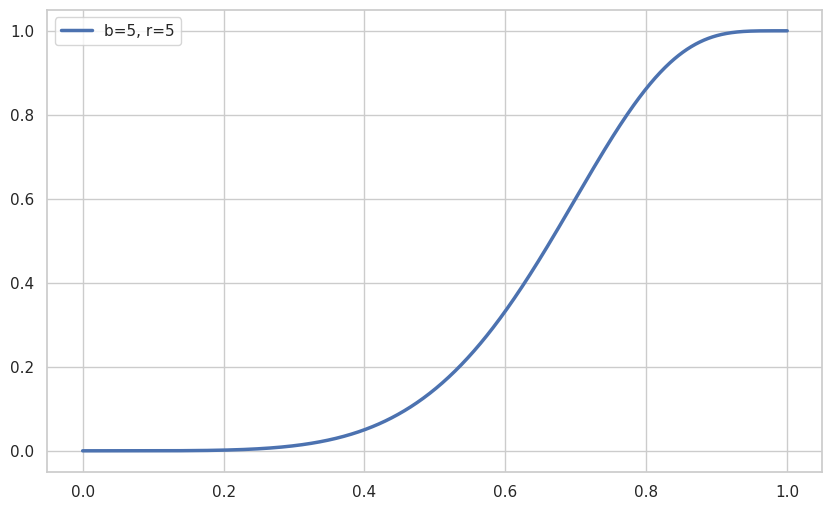

In [484]:
import numpy
import seaborn as sns 

b1 = 5
r1 = 5
print(b1 * r1, (1.0 / b1) ** (1.0 / r1))

%matplotlib inline
from matplotlib import pyplot

t = numpy.linspace(0, 1, 1000)  
p = 1 - numpy.power((1 - numpy.power(t, r1)), b1) 

# Create a Seaborn plot
sns.set(style="whitegrid")  # Set the style for Seaborn
pyplot.figure(figsize=(10, 6))  # Set the figure size

# Plot using Seaborn
sns.lineplot(x=t, y=p, label=f"b={b1}, r={r1}", linewidth=2.5)

# Add labels and title
# pyplot.xlabel("t")
# pyplot.ylabel("p")
# pyplot.title("Seaborn Plot")

# Show legend
pyplot.legend()

# Show the plot
pyplot.show()

In [485]:
from scipy import spatial

dataSetI = [3, 45, 7, 2,9,9]
dataSetII = [2, 54, 13, 15,9,9]
#dataSetII = [3, 45, 7, 2,9,9]

result = spatial.distance.cosine(dataSetI, dataSetII)

print(result)

0.027533619765271022
